In [ ]:
!pip install opencv-python

In [ ]:
import cv2

In [ ]:
! pip install face_recognition

In [ ]:
from imutils import paths  #imutils opencv function
import face_recognition
import pickle
import cv2
import os

In [ ]:
imagePath = list(paths.list_images('/content/face_detection.json'))
kEncodings = []
kNames = []

In [ ]:
imagePath

[]

In [ ]:
arr = ''
for (i, ip) in enumerate(imagePath):
    arr = ip.split(os.path.sep)

In [ ]:
arr

''

In [ ]:
# loop over the image paths
for (i, ip) in enumerate(imagePath):
# extract the person name from the image path
  name = ip.split(os.path.sep)[-2]
# load the input image & convert it from BGR
  image = cv2.imread(ip)
  rgb = cv2.cvtcolor(mage, cv2.COLOR_BGR2RGB)

In [ ]:
# importing all the important libraries
import numpy as np
import pandas as pd
import PIL.Image
import PIL.ImageDraw
import face_recognition
import matplotlib.pyplot as plt

In [ ]:
https://www.kaggle.com/code/prabhat12/face-recognition

In [ ]:
"../input/facerecognition/people.jpg")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


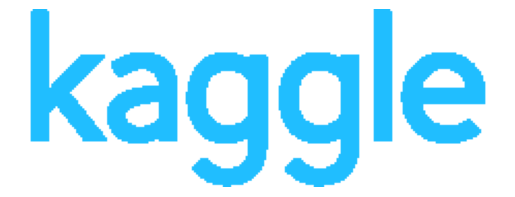

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io

# Fetch the image from the URL
url = "https://www.kaggle.com/static/images/site-logo.png" # Replace with an actual image URL from Kaggle
# example: "https://storage.googleapis.com/kaggle-datasets-images/1267492/2181102/79c5478563f750ca89989d5f37a9d262/dataset-cover.jpg?t=2022-12-02-12-51-32"
with urllib.request.urlopen(url) as response:
  # Read the image data from the response
  image_data = response.read()

# Load the image using face_recognition
manyPeople_img = face_recognition.load_image_file(io.BytesIO(image_data))

# Plot the image using Matplotlib
plt.imshow(manyPeople_img)
plt.axis('off')
plt.show()

In [ ]:
# the image is loaded as an array representing the pixels value in numpy array, printing the shape of array
manyPeople_img.shape

(86, 240, 3)

In [ ]:
# finding location of each face from the array, by default hog is used. We can choose cnn to
faceLocMany = face_recognition.face_locations(manyPeople_img, model="hog")
print("Number of faces: ",len(faceLocMany))
print("\nPosition of each face (top, right, bottom, left) : \n", faceLocMany)

Number of faces:  0

Position of each face (top, right, bottom, left) : 
 []


In [ ]:
# creates an image memory from numpy array
manyPeople_pil = PIL.Image.fromarray(manyPeople_img)

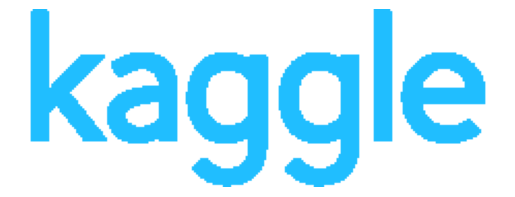

In [ ]:
# drawing a ellipse around the faces in the image
for faceLoc in faceLocMany:

    top, right, bottom, left = faceLoc

    # creating an instance of Draw, to draw on the image
    draw = PIL.ImageDraw.Draw(manyPeople_pil)
    draw.ellipse([(left, top), (right, bottom)], outline="red", width=3)

plt.imshow(manyPeople_pil)
plt.axis('off')
plt.show()

Face location: [(12, 150, 151, 0)]


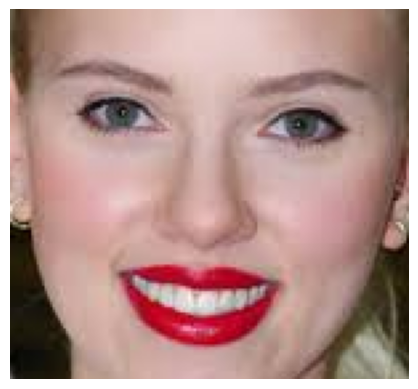

In [ ]:
# single person image
personImage = face_recognition.load_image_file("/content/scarlett_johansson35.png")

personFaceLoc = face_recognition.face_locations(personImage)

print("Face location:", personFaceLoc)

person_pil = PIL.Image.fromarray(personImage)

top, right, bottom, left = list(personFaceLoc[0])

# croping the face area
head = person_pil.crop((left, top, right, bottom))

plt.imshow(head)
plt.axis('off')
plt.show()

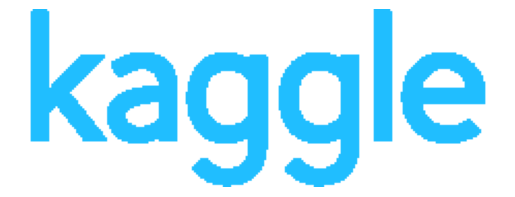

In [ ]:
# finally pasting it on top of group image
manyPeopleCopy_pil = manyPeople_pil.copy()
for faceLoc in faceLocMany:

    top, right, bottom, left = faceLoc

    head = head.resize((abs(right-left),abs(top-bottom)), PIL.Image.ANTIALIAS)
    manyPeopleCopy_pil.paste(head, [left, top])

plt.imshow(manyPeopleCopy_pil)
plt.axis('off')
plt.show()

In [ ]:
# finding the landmarks for single person
faceLandmark_list = face_recognition.face_landmarks(personImage)
faceLandmark_list[0].keys()

dict_keys(['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge', 'nose_tip', 'left_eye', 'right_eye', 'top_lip', 'bottom_lip'])

In [ ]:
# testing it for multiple people
test_faceLandmark_list = face_recognition.face_landmarks(manyPeople_img)
print("Number of faces" , len(test_faceLandmark_list))
# Check if any faces were detected before accessing the list
if test_faceLandmark_list:
    print("Landmarks for each face", test_faceLandmark_list[0].keys())
else:
    print("No faces detected in the image.")

Number of faces 0
No faces detected in the image.


The chin in this face has the following points: [(4, 47), (6, 66), (8, 84), (10, 103), (14, 120), (22, 135), (33, 147), (50, 152), (69, 153), (89, 153), (107, 148), (120, 138), (130, 125), (137, 109), (141, 92), (146, 75), (150, 57)]
The left_eyebrow in this face has the following points: [(16, 37), (27, 32), (39, 32), (51, 36), (62, 41)]
The right_eyebrow in this face has the following points: [(89, 41), (102, 37), (115, 35), (128, 37), (137, 43)]
The nose_bridge in this face has the following points: [(74, 54), (74, 67), (73, 80), (73, 92)]
The nose_tip in this face has the following points: [(60, 96), (65, 99), (72, 102), (78, 100), (84, 98)]
The left_eye in this face has the following points: [(30, 51), (38, 47), (48, 48), (55, 57), (46, 57), (36, 56)]
The right_eye in this face has the following points: [(95, 59), (104, 52), (114, 52), (122, 57), (115, 61), (105, 61)]
The top_lip in this face has the following points: [(40, 113), (51, 109), (63, 108), (71, 110), (80, 109), (92, 11

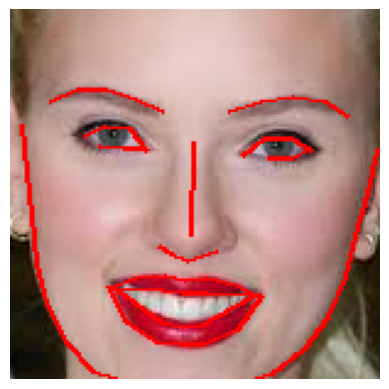

In [ ]:
# creating a copy first so that we can use the original again
personCopy_pil = person_pil.copy()

for faceLandmark in faceLandmark_list:

    # looping over each facial feature
    for name, list_of_points in faceLandmark.items():

        # printing the location of each facial feature
        print("The {} in this face has the following points: {}".format(name, list_of_points))

        # drawing a line on each facial feature
        draw = PIL.ImageDraw.Draw(personCopy_pil)
        draw.line(list_of_points, fill="red", width=2)

plt.imshow(personCopy_pil)
plt.axis('off')
plt.show()

In [ ]:
# eyebrow co-ordinates
left_eyebrow =  faceLandmark_list[0].get('left_eyebrow')
right_eyebrow = faceLandmark_list[0].get('right_eyebrow')
print("Left eyebrow: ", left_eyebrow)
print("\nRight eyebrow: ", right_eyebrow)

Left eyebrow:  [(16, 37), (27, 32), (39, 32), (51, 36), (62, 41)]

Right eyebrow:  [(89, 41), (102, 37), (115, 35), (128, 37), (137, 43)]


In [ ]:
# finding the extreme points
leftmost_point = left_eyebrow[0]
rightmost_point = right_eyebrow[len(right_eyebrow)-1]

print("Leftmost point: ", leftmost_point , " and Righmost point: ", rightmost_point)

Leftmost point:  (16, 37)  and Righmost point:  (137, 43)


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
import os
os.chdir('/content/')

In [ ]:
import os
os.listdir('/content/')

['.config',
 '.ipynb_checkpoints',
 'scarlett_johansson35.png',
 'drive',
 'face_detection.json',
 'sample_data']

In [ ]:
import PIL
import PIL.Image
import PIL.ImageDraw
import matplotlib.pyplot as plt
import os

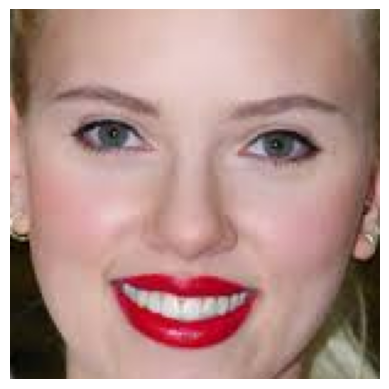

In [ ]:
# loading the person image and goggles image
# ( we have first load the person's image as an array, thus we need to load it again)

image_person = PIL.Image.open("/content/scarlett_johansson35.png")

# resize the goggle's image in accordance with the eyebrows extreme point

final1 = PIL.Image.new("RGBA", image_person.size)

# finally pasting the goggles on top of the face
final1.paste(image_person, (0,0))


plt.imshow(final1)
plt.axis('off')
plt.show()

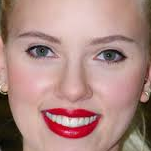

In [ ]:
# we can see that image_person is an image not a numpy array like before
image_person

In [ ]:
# finding face encodings
personEncoding = face_recognition.face_encodings(personImage)[0]
print(personEncoding)

[-0.1372005   0.02663399  0.07801989 -0.13501441 -0.10372394 -0.07240877
  0.00521516 -0.06260732  0.24453604 -0.09134252  0.13168085 -0.0268549
 -0.28567225  0.00750031 -0.0443624   0.23665467 -0.15451224 -0.08989701
 -0.05727563 -0.06726019  0.1192833   0.0745388   0.00928902  0.14004782
 -0.09830341 -0.27583236 -0.07213478 -0.00422817 -0.18071176 -0.10019016
  0.13978162  0.18560842 -0.10314901  0.03586057 -0.00261214  0.10593968
 -0.02765032 -0.19611116  0.17764117  0.09316088 -0.22941107 -0.044949
  0.05848147  0.24500287  0.20532823 -0.04178648  0.03233943 -0.10276228
  0.1673312  -0.35130844 -0.04529502  0.12823579 -0.12771708  0.058945
  0.06280003 -0.25411764  0.09002951  0.10897191 -0.24421507 -0.00622307
  0.02750567 -0.1874146  -0.01329977 -0.07427892  0.20726863  0.1598047
 -0.15525788 -0.18582791  0.18311019 -0.1406547  -0.05909091  0.12256202
 -0.16851014 -0.19243109 -0.26244235  0.0352381   0.42477655  0.08509737
 -0.11006925  0.0433329  -0.11933915 -0.01189132 -0.00921

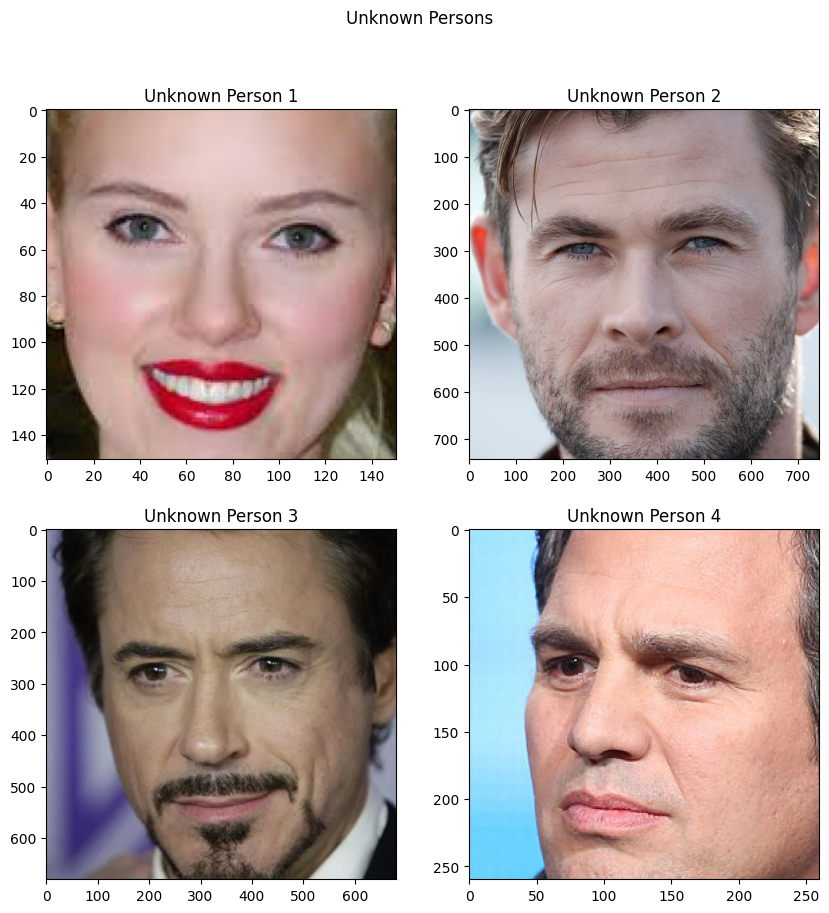

In [ ]:
unknownPerson1 = face_recognition.load_image_file("/content/scarlett_johansson35.png")
unknownPerson2 = face_recognition.load_image_file("/content/chris_hemsworth15.png")
unknownPerson3 = face_recognition.load_image_file("/content/robert_downey_jr42.png")
unknownPerson4 = face_recognition.load_image_file("/content/mark_ruffalo47.png")

fig,axs = plt.subplots(2,2, figsize = [10,10])

axs[0][0].imshow(unknownPerson1)
axs[0][0].set_title('Unknown Person 1')

axs[0][1].imshow(unknownPerson2)
axs[0][1].set_title('Unknown Person 2')

axs[1][0].imshow(unknownPerson3)
axs[1][0].set_title('Unknown Person 3')

axs[1][1].imshow(unknownPerson4)
axs[1][1].set_title('Unknown Person 4')

plt.suptitle("Unknown Persons")
plt.show()


Person 0  is a match?  True
Euclidian distance between faces for person 1  : 0.0

Person 1  is a match?  False
Euclidian distance between faces for person 2  : 1.0184298772610552

Person 2  is a match?  False
Euclidian distance between faces for person 3  : 0.9496695841608165

Person 3  is a match?  False
Euclidian distance between faces for person 4  : 1.01447742022978



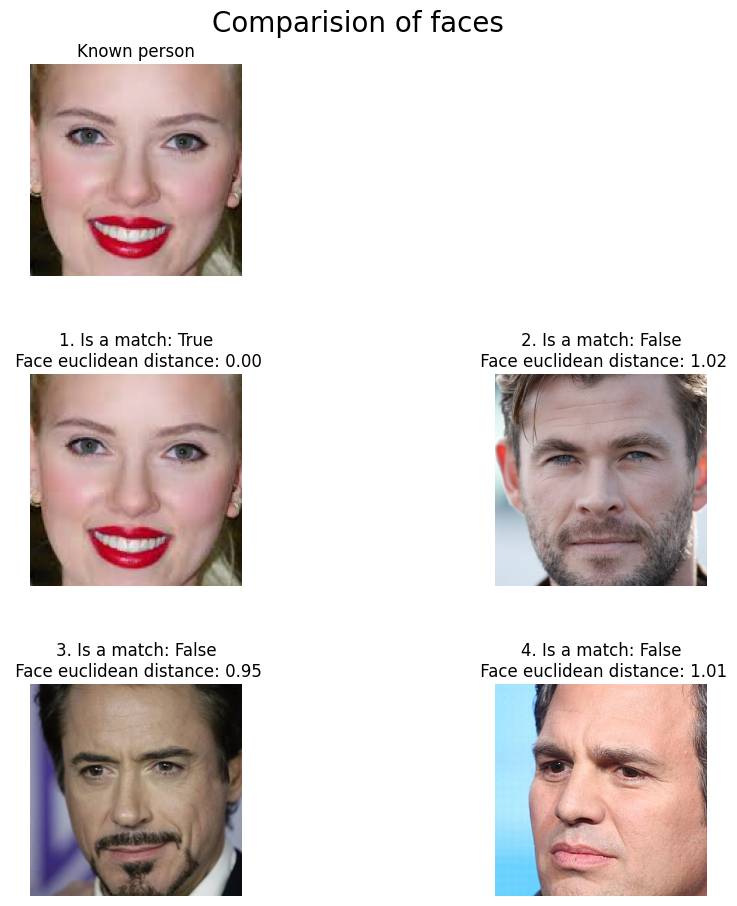

In [ ]:
# creating a list of unknown face encodings
unknownPersonList = [

    face_recognition.face_encodings(unknownPerson1)[0],
    face_recognition.face_encodings(unknownPerson2)[0],
    face_recognition.face_encodings(unknownPerson3)[0],
    face_recognition.face_encodings(unknownPerson4)[0]
]

distance=[]
match=[]
# for each unknown face encoding, comapre it with the single person encoding
for (i,unknownPerson) in enumerate(unknownPersonList):

    result = face_recognition.compare_faces( [personEncoding], unknownPerson, tolerance=0.6)[0]
    print("Person", i, " is a match? ", result)

    face_distance = face_recognition.face_distance([personEncoding], unknownPerson)[0]
    print("Euclidian distance between faces for person", int(i)+1 ," :", face_distance)

    distance.append(face_distance)
    match.append(result)

    print()

fig,axs = plt.subplots(3,2, figsize = [10,10])

fig.tight_layout(pad = 5.0)

plt.suptitle("Comparision of faces", fontsize = 20)


axs[0][0].imshow(personImage)
axs[0][0].set_title("Known person")
axs[0][0].axis('off')

fig.delaxes(axs[0][1])

axs[1][0].imshow(unknownPerson1)
axs[1][0].set_title('1. Is a match: ' + str(match[0]) + '\n Face euclidean distance: ' + str("{:.2f}".format(distance[0])))
axs[1][0].axis('off')

axs[1][1].imshow(unknownPerson2)
axs[1][1].set_title('2. Is a match: ' + str(match[1]) + '\n Face euclidean distance: ' + str("{:.2f}".format(distance[1])))
axs[1][1].axis('off')

axs[2][0].imshow(unknownPerson3)
axs[2][0].set_title('3. Is a match: ' + str(match[2]) + '\n Face euclidean distance: ' + str("{:.2f}".format(distance[2])))
axs[2][0].axis('off')

axs[2][1].imshow(unknownPerson4)
axs[2][1].set_title('4. Is a match: ' + str(match[3]) + '\n Face euclidean distance: ' + str("{:.2f}".format(distance[3])))
axs[2][1].axis('off')


plt.show()

Number of persons:  0


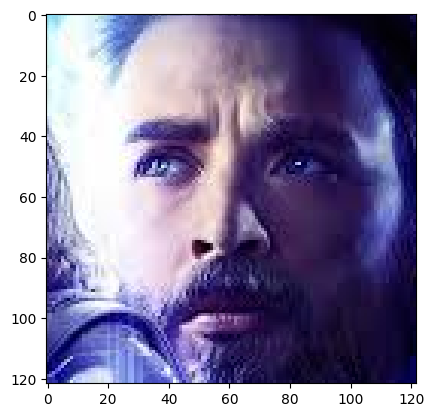

In [ ]:
# image containing more than one clear face
groupOfUnknown = face_recognition.load_image_file('/content/chris_evans32.png')

groupEncoding = face_recognition.face_encodings(groupOfUnknown)

print("Number of persons: ", len(groupEncoding))

for (i,encoding) in enumerate(groupEncoding):

    result = face_recognition.compare_faces( [personEncoding], encoding, tolerance=0.6)[0]

    if(result == True):
        print("Match found")
        break


plt.imshow(groupOfUnknown)
plt.show()

Before : Number of persons:  1  due to low resolution
After : Number of persons:  1
Match found ? False
Euclidian distance between faces:  0.9089933852472531


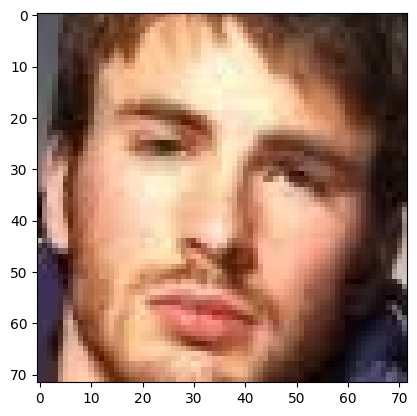

In [ ]:
low_resolution = face_recognition.load_image_file('/content/chris_evans42.png')

encoding = face_recognition.face_encodings(low_resolution)

print("Before : Number of persons: ", len(encoding) , " due to low resolution")

faceLoc = face_recognition.face_locations( low_resolution, number_of_times_to_upsample = 2 )
encoding = face_recognition.face_encodings(low_resolution, known_face_locations = faceLoc)

print("After : Number of persons: ", len(encoding))

result = face_recognition.compare_faces( personEncoding, encoding, tolerance=0.6)[0]
print("Match found ?", result)

face_distance = face_recognition.face_distance(personEncoding, encoding)[0]
print("Euclidian distance between faces: ", face_distance)


plt.imshow(low_resolution)
plt.show()